In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
feature=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [4]:
# load data
data  = pd.read_csv('heart+disease/processed.cleveland.data', sep=",",names=feature)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
data = data.replace({'?':np.NaN})

In [9]:
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null object
thal        297 non-null object
target      297 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [11]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['ca']= label_encoder.fit_transform(data['ca'])
data['thal']= label_encoder.fit_transform(data['thal'])

data['ca'].unique()
data['thal'].unique()

array([1, 0, 2], dtype=int64)

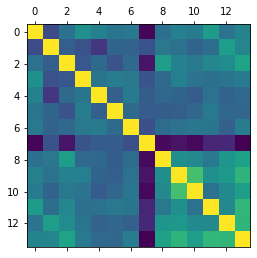

In [12]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

In [13]:
# changing attack labels to their respective attack class
def change_label(df):
  df.target.replace([1,2,3,4],1,inplace=True)

In [14]:
change_label(data)

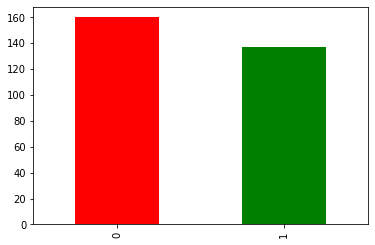

In [15]:
data.target.value_counts().plot(kind='bar',color=['red','green']);

In [16]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
data.to_csv('cleveland_processed.csv')

In [18]:
X = data.drop(["target"],axis =1)
y = data["target"]

In [19]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
from imblearn.metrics import specificity_score, sensitivity_score

In [21]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10, random_state=42)

In [22]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
spec = []
sens = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    spec.append(round(e,3))
    sens.append(round(f,3))

In [23]:
ML_Model1 = []
accuracy1 = []
precision1 = []
recall1 = []
f1score1 = []
spec1 = []
sens1 = []

#function to call for storing the results
def storeResults1(model, a,b,c,d,e,f):
    ML_Model1.append(model)
    accuracy1.append(round(a, 3))
    precision1.append(round(b, 3))
    recall1.append(round(c, 3))
    f1score1.append(round(d, 3))
    spec1.append(round(e,3))
    sens1.append(round(f,3))

# Modelling

# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')
knn_spec = specificity_score(y_pred, y_test,average='weighted')
knn_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [25]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1,knn_spec,knn_sens)

# Linear SVC

In [26]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0, tol=1e-5)
lsvc.fit(X_train, y_train)

y_pred    = lsvc.predict(X_test)

lsvc_acc = accuracy_score(y_pred, y_test)
lsvc_prec = precision_score(y_pred, y_test,average='weighted')
lsvc_rec = recall_score(y_pred, y_test,average='weighted')
lsvc_f1 = f1_score(y_pred, y_test,average='weighted')
lsvc_spec = specificity_score(y_pred, y_test,average='weighted')
lsvc_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [27]:
storeResults('LinearSVC',lsvc_acc,lsvc_prec,lsvc_rec,lsvc_f1,lsvc_spec,lsvc_sens)

# Gaussian Process

In [28]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)

gp = GaussianProcessClassifier(kernel=kernel,random_state=0)
gp.fit(X_train, y_train)

y_pred    = gp.predict(X_test)

gp_acc = accuracy_score(y_pred, y_test)
gp_prec = precision_score(y_pred, y_test,average='weighted')
gp_rec = recall_score(y_pred, y_test,average='weighted')
gp_f1 = f1_score(y_pred, y_test,average='weighted')
gp_spec = specificity_score(y_pred, y_test,average='weighted')
gp_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [29]:
storeResults('Guassian Process',gp_acc,gp_prec,gp_rec,gp_f1,gp_spec,gp_sens)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1000)

tree.fit(X_train, y_train)

y_pred    = tree.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')
dt_spec = specificity_score(y_pred, y_test,average='weighted')
dt_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [31]:
storeResults('Decision Tree',dt_acc,dt_prec,dt_rec,dt_f1,dt_spec,dt_sens)

# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred    = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
nb_spec = specificity_score(y_pred, y_test,average='weighted')
nb_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [33]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1,nb_spec,nb_sens)

# QDA

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred    = qda.predict(X_test)

qda_acc = accuracy_score(y_pred, y_test)
qda_prec = precision_score(y_pred, y_test,average='weighted')
qda_rec = recall_score(y_pred, y_test,average='weighted')
qda_f1 = f1_score(y_pred, y_test,average='weighted')
qda_spec = specificity_score(y_pred, y_test,average='weighted')
qda_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [35]:
storeResults('QDA',qda_acc,qda_prec,qda_rec,qda_f1,qda_spec,qda_sens)

# AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)

ab.fit(X_train, y_train)

y_pred    = ab.predict(X_test)

ab_acc = accuracy_score(y_pred, y_test)
ab_prec = precision_score(y_pred, y_test,average='weighted')
ab_rec = recall_score(y_pred, y_test,average='weighted')
ab_f1 = f1_score(y_pred, y_test,average='weighted')
ab_spec = specificity_score(y_pred, y_test,average='weighted')
ab_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [37]:
storeResults('AdaBoost',ab_acc,ab_prec,ab_rec,ab_f1,ab_spec,ab_sens)

# Bagging Classifier

In [38]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=10, random_state=0)
clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)
bg_acc = accuracy_score(y_pred, y_test)
bg_prec = precision_score(y_pred, y_test,average='weighted')
bg_rec = recall_score(y_pred, y_test,average='weighted')
bg_f1 = f1_score(y_pred, y_test,average='weighted')
bg_spec = specificity_score(y_pred, y_test,average='weighted')
bg_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [39]:
storeResults('Bagging',bg_acc,bg_prec,bg_rec,bg_f1,bg_spec,bg_sens)

# Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
clf =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)

y_pred    = clf.predict(X_test)
bos_acc = accuracy_score(y_pred, y_test)
bos_prec = precision_score(y_pred, y_test,average='weighted')
bos_rec = recall_score(y_pred, y_test,average='weighted')
bos_f1 = f1_score(y_pred, y_test,average='weighted')
bos_spec = specificity_score(y_pred, y_test,average='weighted')
bos_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [41]:
storeResults('Boosting',bos_acc,bos_prec,bos_rec,bos_f1,bos_spec,bos_sens)

# Stacking Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=1000)),('mlp', MLPClassifier(random_state=1, max_iter=3000))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=1000))


clf.fit(X_train,y_train)

y_pred    = clf.predict(X_test)
stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')
stac_spec = specificity_score(y_pred, y_test,average='weighted')
stac_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [43]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1,stac_spec,stac_sens)

# Voting Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = DecisionTreeClassifier(random_state=50)
clf2 = RandomForestClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('ad', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train,y_train)
y_pred    = eclf1.predict(X_test)
vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
vot_spec = specificity_score(y_pred, y_test,average='weighted')
vot_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [45]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_spec,vot_sens)

# DNN

In [46]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

In [47]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# 3 Layers

In [48]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 42s 14ms/step - loss: 0.6936 - accuracy: 0.5135 - val_loss: 0.6642 - val_accuracy: 0.6667
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4923 - val_loss: 0.6907 - val_accuracy: 0.6296
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5081 - val_loss: 0.6893 - val_accuracy: 0.6481
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.6043 - val_loss: 0.6439 - val_accuracy: 0.6667
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.6113 - val_loss: 0.6226 - val_accuracy: 0.7222
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6258 - val_loss: 0.7414 - val_accuracy: 0.4815
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6385 - val_loss: 0.6716 - val_accuracy: 0.55

107/107 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8464 - val_loss: 0.7577 - val_accuracy: 0.7778
Epoch 58/100
107/107 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7740 - val_loss: 0.5302 - val_accuracy: 0.8148
Epoch 59/100
107/107 [==============================] - 0s 3ms/step - loss: 0.4066 - accuracy: 0.8648 - val_loss: 0.7080 - val_accuracy: 0.7778
Epoch 60/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8218 - val_loss: 0.4762 - val_accuracy: 0.7963
Epoch 61/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3202 - accuracy: 0.8673 - val_loss: 0.5451 - val_accuracy: 0.8148
Epoch 62/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8305 - val_loss: 0.5002 - val_accuracy: 0.8148
Epoch 63/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.8441 - val_loss: 0.5053 - val_accuracy: 0.8148
Epoch

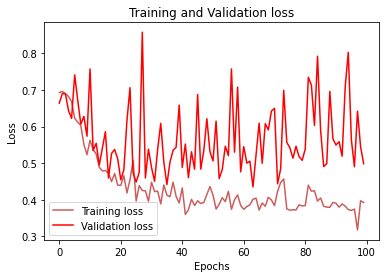

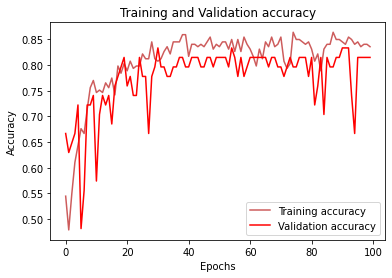

In [50]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

In [52]:
dnn_3_acc = accuracy_score(y_pred, y_test)
dnn_3_prec = precision_score(y_pred, y_test,average='weighted')
dnn_3_rec = recall_score(y_pred, y_test,average='weighted')
dnn_3_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_3_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_3_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [53]:
storeResults1('DNN - 3 Layers',dnn_3_acc,dnn_3_prec,dnn_3_rec,dnn_3_f1,dnn_3_spec,dnn_3_sens)

# 4 Layers

In [54]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 4s 11ms/step - loss: 0.6954 - accuracy: 0.4784 - val_loss: 0.6929 - val_accuracy: 0.6667
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5088 - val_loss: 0.6908 - val_accuracy: 0.6667
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5066 - val_loss: 0.6851 - val_accuracy: 0.6667
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5382 - val_loss: 0.6904 - val_accuracy: 0.5370
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.6123 - val_loss: 0.6846 - val_accuracy: 0.5370
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.6046 - val_loss: 0.7273 - val_accuracy: 0.3519
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.6538 - val_loss: 0.6198 - val_accuracy: 0.685

Epoch 58/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8057 - val_loss: 0.6282 - val_accuracy: 0.8333
Epoch 59/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8923 - val_loss: 0.4786 - val_accuracy: 0.8148
Epoch 60/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8298 - val_loss: 0.6748 - val_accuracy: 0.8148
Epoch 61/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8829 - val_loss: 0.4667 - val_accuracy: 0.7963
Epoch 62/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8693 - val_loss: 0.5849 - val_accuracy: 0.8148
Epoch 63/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8446 - val_loss: 0.5214 - val_accuracy: 0.8148
Epoch 64/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8561 - val_loss: 0.4716 - val_accuracy:

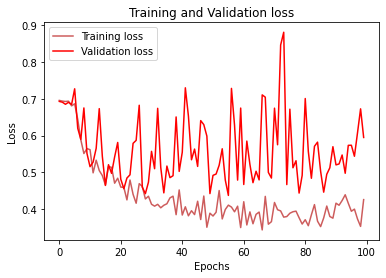

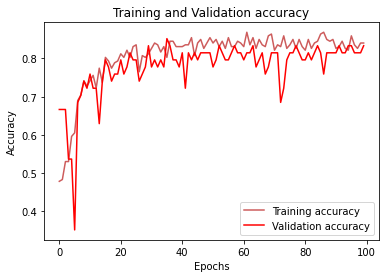

In [56]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_4_acc = accuracy_score(y_pred, y_test)
dnn_4_prec = precision_score(y_pred, y_test,average='weighted')
dnn_4_rec = recall_score(y_pred, y_test,average='weighted')
dnn_4_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_4_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_4_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [58]:
storeResults1('DNN - 4 Layers',dnn_4_acc,dnn_4_prec,dnn_4_rec,dnn_4_f1,dnn_4_spec,dnn_4_sens)

# 5 Layers

In [59]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [60]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 5s 13ms/step - loss: 0.6936 - accuracy: 0.4922 - val_loss: 0.6935 - val_accuracy: 0.3333
Epoch 2/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4843 - val_loss: 0.6946 - val_accuracy: 0.3333
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.7067 - val_accuracy: 0.3333
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4952 - val_loss: 0.6967 - val_accuracy: 0.3333
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5331 - val_loss: 0.6915 - val_accuracy: 0.7037
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5776 - val_loss: 0.7439 - val_accuracy: 0.5000
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6651 - val_loss: 0.8470 - val_accuracy: 0.481

Epoch 58/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3662 - accuracy: 0.8653 - val_loss: 0.5090 - val_accuracy: 0.7963
Epoch 59/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8719 - val_loss: 0.5790 - val_accuracy: 0.8148
Epoch 60/100
107/107 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.8275 - val_loss: 0.5462 - val_accuracy: 0.8148
Epoch 61/100
107/107 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.8134 - val_loss: 0.5365 - val_accuracy: 0.8148
Epoch 62/100
107/107 [==============================] - 0s 3ms/step - loss: 0.4476 - accuracy: 0.8097 - val_loss: 0.6525 - val_accuracy: 0.7778
Epoch 63/100
107/107 [==============================] - 0s 3ms/step - loss: 0.3926 - accuracy: 0.8238 - val_loss: 0.5015 - val_accuracy: 0.8148
Epoch 64/100
107/107 [==============================] - 0s 4ms/step - loss: 0.3985 - accuracy: 0.8233 - val_loss: 0.5312 - val_accuracy:

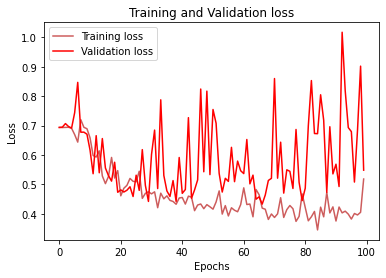

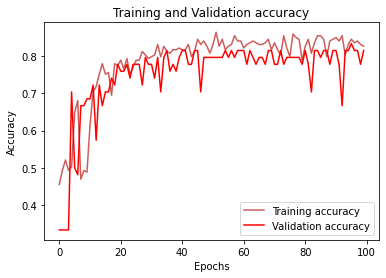

In [61]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_5_acc = accuracy_score(y_pred, y_test)
dnn_5_prec = precision_score(y_pred, y_test,average='weighted')
dnn_5_rec = recall_score(y_pred, y_test,average='weighted')
dnn_5_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_5_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_5_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [63]:
storeResults1('DNN - 5 Layers',dnn_5_acc,dnn_5_prec,dnn_5_rec,dnn_5_f1,dnn_5_spec,dnn_5_sens)

# 6 Layers

In [64]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [65]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 6s 15ms/step - loss: 0.6933 - accuracy: 0.5327 - val_loss: 0.6927 - val_accuracy: 0.6667
Epoch 2/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4659 - val_loss: 0.6964 - val_accuracy: 0.3333
Epoch 3/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5190 - val_loss: 0.6905 - val_accuracy: 0.6667
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4595 - val_loss: 0.6891 - val_accuracy: 0.6667
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4993 - val_loss: 0.6776 - val_accuracy: 0.6667
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5555 - val_loss: 0.6934 - val_accuracy: 0.3704
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5407 - val_loss: 0.6945 - val_accuracy: 0.333

Epoch 58/100
107/107 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.8179 - val_loss: 0.5351 - val_accuracy: 0.8148
Epoch 59/100
107/107 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.7960 - val_loss: 0.5727 - val_accuracy: 0.8148
Epoch 60/100
107/107 [==============================] - 0s 4ms/step - loss: 0.4712 - accuracy: 0.7936 - val_loss: 0.5761 - val_accuracy: 0.7778
Epoch 61/100
107/107 [==============================] - 0s 4ms/step - loss: 0.5918 - accuracy: 0.7893 - val_loss: 0.6139 - val_accuracy: 0.7963
Epoch 62/100
107/107 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8275 - val_loss: 0.4582 - val_accuracy: 0.7963
Epoch 63/100
107/107 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.7781 - val_loss: 0.6422 - val_accuracy: 0.7593
Epoch 64/100
107/107 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.8217 - val_loss: 0.4748 - val_accuracy:

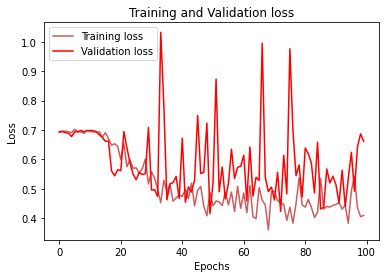

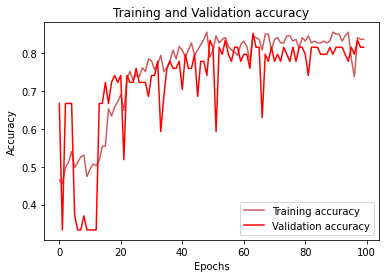

In [66]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_6_acc = accuracy_score(y_pred, y_test)
dnn_6_prec = precision_score(y_pred, y_test,average='weighted')
dnn_6_rec = recall_score(y_pred, y_test,average='weighted')
dnn_6_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_6_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_6_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [68]:
storeResults1('DNN - 6 Layers',dnn_6_acc,dnn_6_prec,dnn_6_rec,dnn_6_f1,dnn_6_spec,dnn_6_sens)

# 7 Layers

In [69]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [70]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

Epoch 1/100
107/107 [==============================] - 6s 16ms/step - loss: 0.6933 - accuracy: 0.4358 - val_loss: 0.6934 - val_accuracy: 0.3333
Epoch 2/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4561 - val_loss: 0.6945 - val_accuracy: 0.3333
Epoch 3/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5142 - val_loss: 0.6943 - val_accuracy: 0.3333
Epoch 4/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5224 - val_loss: 0.6942 - val_accuracy: 0.3333
Epoch 5/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5400 - val_loss: 0.6945 - val_accuracy: 0.3333
Epoch 6/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4690 - val_loss: 0.6942 - val_accuracy: 0.3333
Epoch 7/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5380 - val_loss: 0.6944 - val_accuracy: 0.333

Epoch 58/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5227 - val_loss: 0.6979 - val_accuracy: 0.3333
Epoch 59/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6975 - val_accuracy: 0.3333
Epoch 60/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4776 - val_loss: 0.6979 - val_accuracy: 0.3333
Epoch 61/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4531 - val_loss: 0.6979 - val_accuracy: 0.3333
Epoch 62/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4887 - val_loss: 0.6974 - val_accuracy: 0.3333
Epoch 63/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4859 - val_loss: 0.6976 - val_accuracy: 0.3333
Epoch 64/100
107/107 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4890 - val_loss: 0.6977 - val_accuracy:

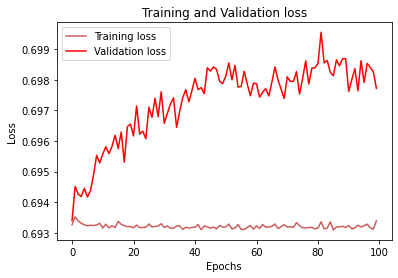

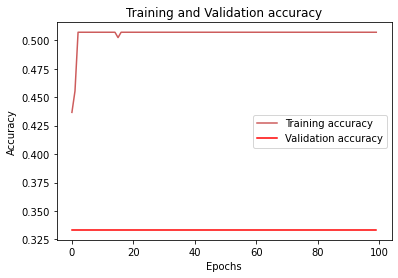

In [71]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_7_acc = accuracy_score(y_pred, y_test)
dnn_7_prec = precision_score(y_pred, y_test,average='weighted')
dnn_7_rec = recall_score(y_pred, y_test,average='weighted')
dnn_7_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_7_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_7_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [ ]:
storeResults1('DNN - 7 Layers',dnn_7_acc,dnn_7_prec,dnn_7_rec,dnn_7_f1,dnn_7_spec,dnn_7_sens)

# 8 Layers

In [ ]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_8_acc = accuracy_score(y_pred, y_test)
dnn_8_prec = precision_score(y_pred, y_test,average='weighted')
dnn_8_rec = recall_score(y_pred, y_test,average='weighted')
dnn_8_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_8_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_8_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [ ]:
storeResults1('DNN - 8 Layers',dnn_8_acc,dnn_8_prec,dnn_8_rec,dnn_8_f1,dnn_8_spec,dnn_8_sens)

# 9 Layers

In [ ]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split=0.2)

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)

dnn_9_acc = accuracy_score(y_pred, y_test)
dnn_9_prec = precision_score(y_pred, y_test,average='weighted')
dnn_9_rec = recall_score(y_pred, y_test,average='weighted')
dnn_9_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_9_spec = specificity_score(y_pred, y_test,average='weighted')
dnn_9_sens = sensitivity_score(y_pred, y_test,average='weighted')

In [ ]:
storeResults1('DNN - 9 Layers',dnn_9_acc,dnn_9_prec,dnn_9_rec,dnn_9_f1,dnn_9_spec,dnn_9_sens)

# Comparison

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'Specificity' : spec,
                       'Sensitivity' : sens
                      }) 

In [ ]:
result

# Modelling

In [ ]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

In [ ]:
#creating dataframe
result1 = pd.DataFrame({ 'ML Model' : ML_Model1,
                        'Accuracy' : accuracy1,
                       'Precision': precision1,
                       'Recall'   : recall1, 
                       'F1_score' : f1score1,
                       'Specificity' : spec1,
                       'Sensitivity' : sens1
                      }) 

In [ ]:
result1

# Graph

# ML

In [ ]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

In [ ]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

In [ ]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

In [ ]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

In [ ]:
plt2.barh(y_pos, spec, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

In [ ]:
plt2.barh(y_pos, sens, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()

# DL

In [ ]:
classifier = ML_Model1
y_pos = np.arange(len(classifier))

# ACcuracy

In [ ]:
plt2.barh(y_pos, accuracy1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

In [ ]:
plt2.barh(y_pos, precision1, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

In [ ]:
plt2.barh(y_pos, recall1, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

In [ ]:
plt2.barh(y_pos, f1score1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Specificity

In [ ]:
plt2.barh(y_pos, spec1, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity')
plt2.title('Classification Performance')
plt2.show()

# Sensitivity

In [ ]:
plt2.barh(y_pos, sens1, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Sensitivity')
plt2.title('Classification Performance')
plt2.show()